##                                         MODEL TRAINING 

### Importing the data and libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import warnings


#### Importing the data

In [3]:
df = pd.read_csv(r'C:\mlproject\MachineLearningProject\Notebook\data\stud.csv',encoding = 'unicode_escape')

In [4]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


### Creating X and Y

In [5]:
X = df.drop(columns = ['math_score'])

In [6]:
X.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88


In [7]:
y = df['math_score']

In [8]:
y.head()

0    72
1    69
2    90
3    47
4    76
Name: math_score, dtype: int64

In [9]:
print("Categories in 'gender' variables:",end= " ")
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variables:",end= " ")
print(df['race_ethnicity'].unique())

print("Categories in 'parental_level_of_education' variables:",end= " ")
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variables:",end= " ")
print(df['lunch'].unique())

print("Categories in 'test_preparation_course' variables:",end= " ")
print(df['test_preparation_course'].unique())

Categories in 'gender' variables: ['female' 'male']
Categories in 'race_ethnicity' variables: ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental_level_of_education' variables: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variables: ['standard' 'free/reduced']
Categories in 'test_preparation_course' variables: ['none' 'completed']


### Creating Column with 3 transformer

In [10]:
num_feature = X.select_dtypes(exclude = 'object').columns
cat_feature = X.select_dtypes(include = 'object').columns

from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

num_encoder = StandardScaler()
oh_encoder = OneHotEncoder()

preprocessor = ColumnTransformer(
 
    [
        ('OneHotEncoder',oh_encoder,cat_feature),
    ('StandardScaler',num_encoder,num_feature)
    ]
)

    



In [11]:
X = preprocessor.fit_transform(X)

In [12]:
X

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]], shape=(1000, 19))

In [13]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)
x_train.shape,x_test.shape

((800, 19), (200, 19))

#### Create an Evaluate Function to give all metrics after model Training

In [14]:
def evaluate(true,predicted):
    mae = mean_absolute_error(true,predicted)
    mse = mean_squared_error(true,predicted)
    rsme = np.sqrt(mean_squared_error(true,predicted))
    r2 = r2_score(true,predicted)
    return mae,rsme,r2

In [18]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}

model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train,y_train)     #Train model

    #Make prediction
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    #evaluate train and test dataset

    model_train_mae,model_train_rsme,model_train_r2 = evaluate(y_train,y_train_pred)
    model_test_mae,model_test_rsme,model_test_r2 = evaluate(y_test,y_test_pred)

    print(list(models.keys())[i]) 
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rsme))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rsme))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 5.3231
- Mean Absolute Error: 4.2667
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3940
- Mean Absolute Error: 4.2148
- R2 Score: 0.8804


Lasso
Model performance for Training set
- Root Mean Squared Error: 6.5938
- Mean Absolute Error: 5.2063
- R2 Score: 0.8071
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.5197
- Mean Absolute Error: 5.1579
- R2 Score: 0.8253


Ridge
Model performance for Training set
- Root Mean Squared Error: 5.3233
- Mean Absolute Error: 4.2650
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3904
- Mean Absolute Error: 4.2111
- R2 Score: 0.8806


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 5.7077
- Mean Absolute Error: 4.5167
- R2 Score: 0.8555
-----------------------

In [29]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=('Model Name','R2 Score')).sort_values(by = ['R2 Score'],ascending=False)


,Model Name,R2 Score
2,Ridge,0.880593
0,Linear Regression,0.880433
7,CatBoosting Regressor,0.851632
8,AdaBoost Regressor,0.850058
5,Random Forest Regressor,0.848681
6,XGBRegressor,0.827797
1,Lasso,0.825320
3,K-Neighbors Regressor,0.783813
4,Decision Tree,0.748786


## Linear Regression

In [33]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(x_train,y_train)
y_pred = lin_model.predict(x_test)
score = r2_score(y_test,y_pred)*100
print(" Accuracy of the model is %.2f" %score)


 Accuracy of the model is 88.04


Text(0, 0.5, 'Predicted Value')

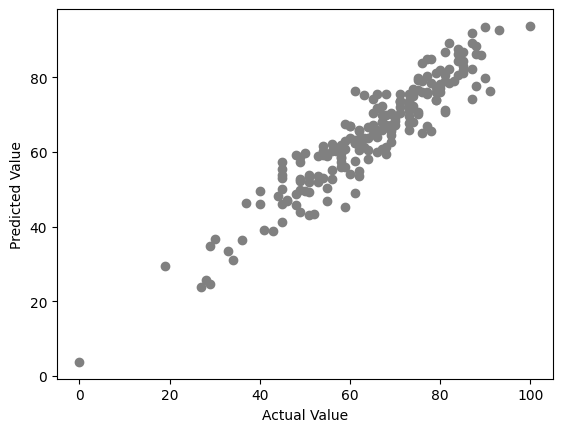

In [ ]:
plt.scatter(y_test,y_pred,c ='grey')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')

<Axes: xlabel='math_score'>

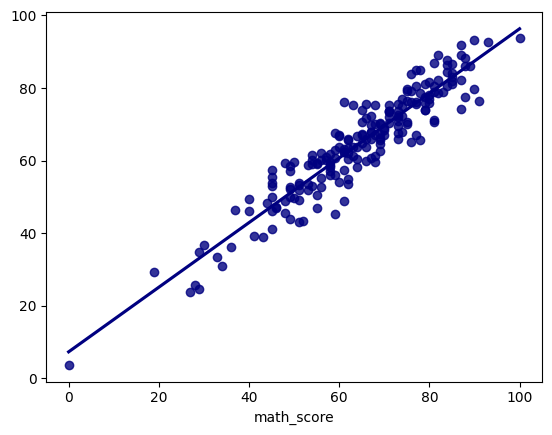

In [39]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='navy')

In [40]:
pred_diff = pd.DataFrame({
    "Actual Value":y_test,
    "Predicted Value":y_pred,
    "Difference":y_test - y_pred
})

In [41]:
pred_diff

,Actual Value,Predicted Value,Difference
521,91,76.387970,14.612030
737,53,58.885970,-5.885970
740,80,76.990265,3.009735
660,74,76.851804,-2.851804
411,84,87.627378,-3.627378
...,...,...,...
408,52,43.409149,8.590851
332,62,62.152214,-0.152214
208,74,67.888395,6.111605
613,65,67.022287,-2.022287
